Submitted By:

***Md. Aukerul Moin Shuvo***

Roll: 1603061

**CSE, RUET.**


Submitted To:

***Abu Sayeed***

Assistant Professor

**CSE, RUET.**

# Continuous Wavelet Transformation

The Continuous Wavelet Transform (CWT) is used to decompose a signal into wavelets. Wavelets are small oscillations that are highly localized in time. The CWT's basis functions are scaled and shifted versions of the time-localized mother wavelet. The CWT is used to construct a time-frequency representation of a signal that offers very good time and frequency localization.

The CWT is an excellent tool for mapping the changing properties of non-stationary signals. The CWT is also an ideal tool for determining whether or not a signal is stationary in a global sense. When a signal is judged non-stationary, the CWT can be used to identify stationary sections of the data stream.

***Implementation of Continuous Wavelet Transform (CWT)***

*Libraries*

In [2]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0.5, 1.0, 'Mexican Hat Wavelet')

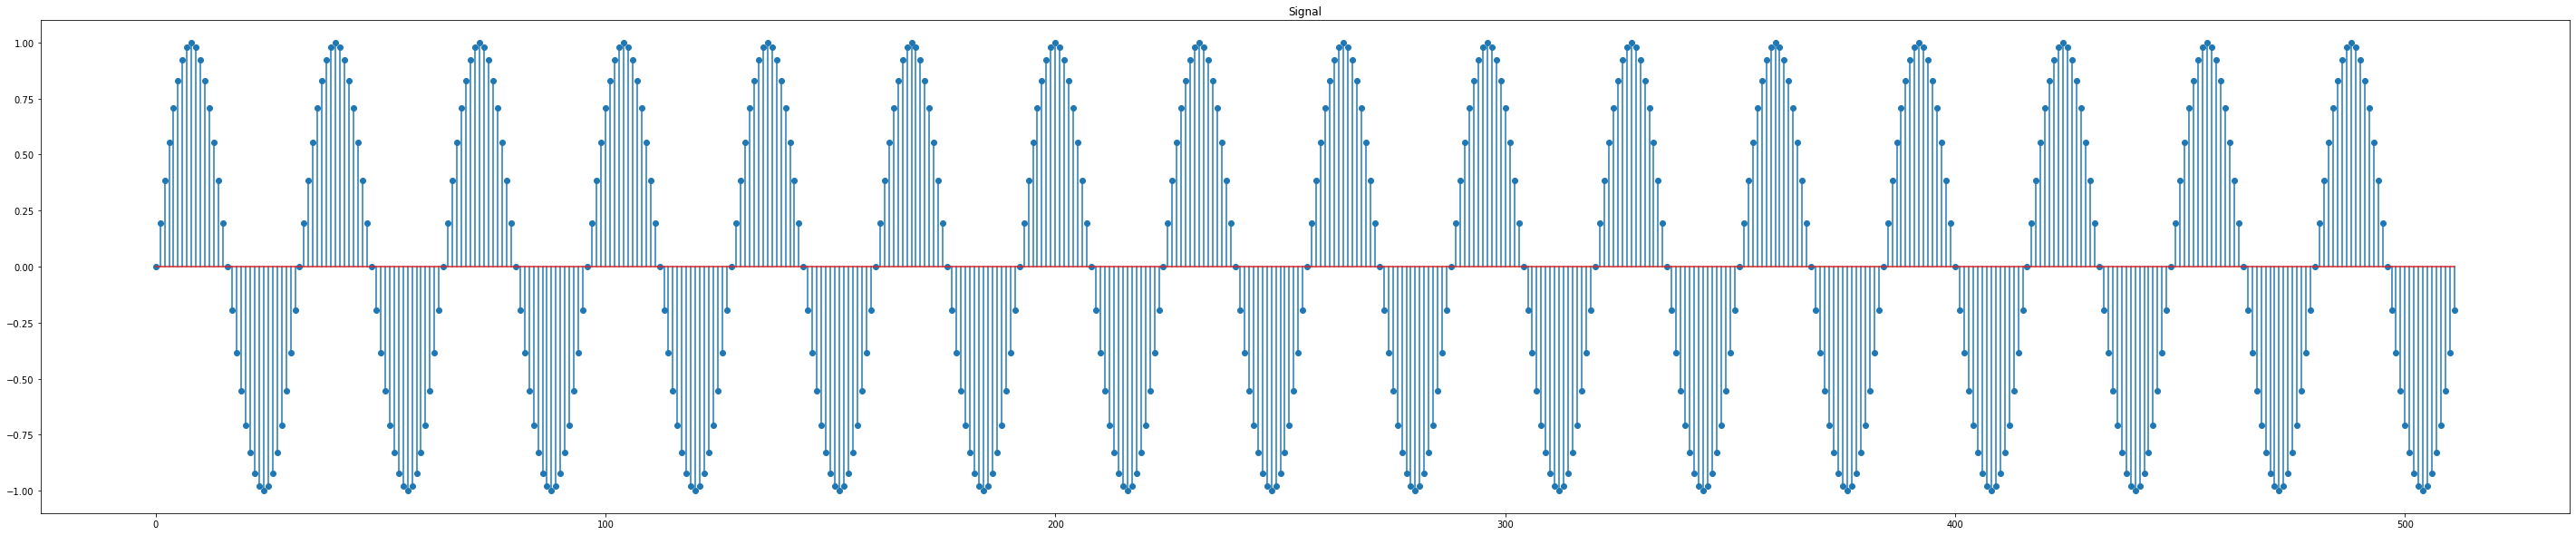

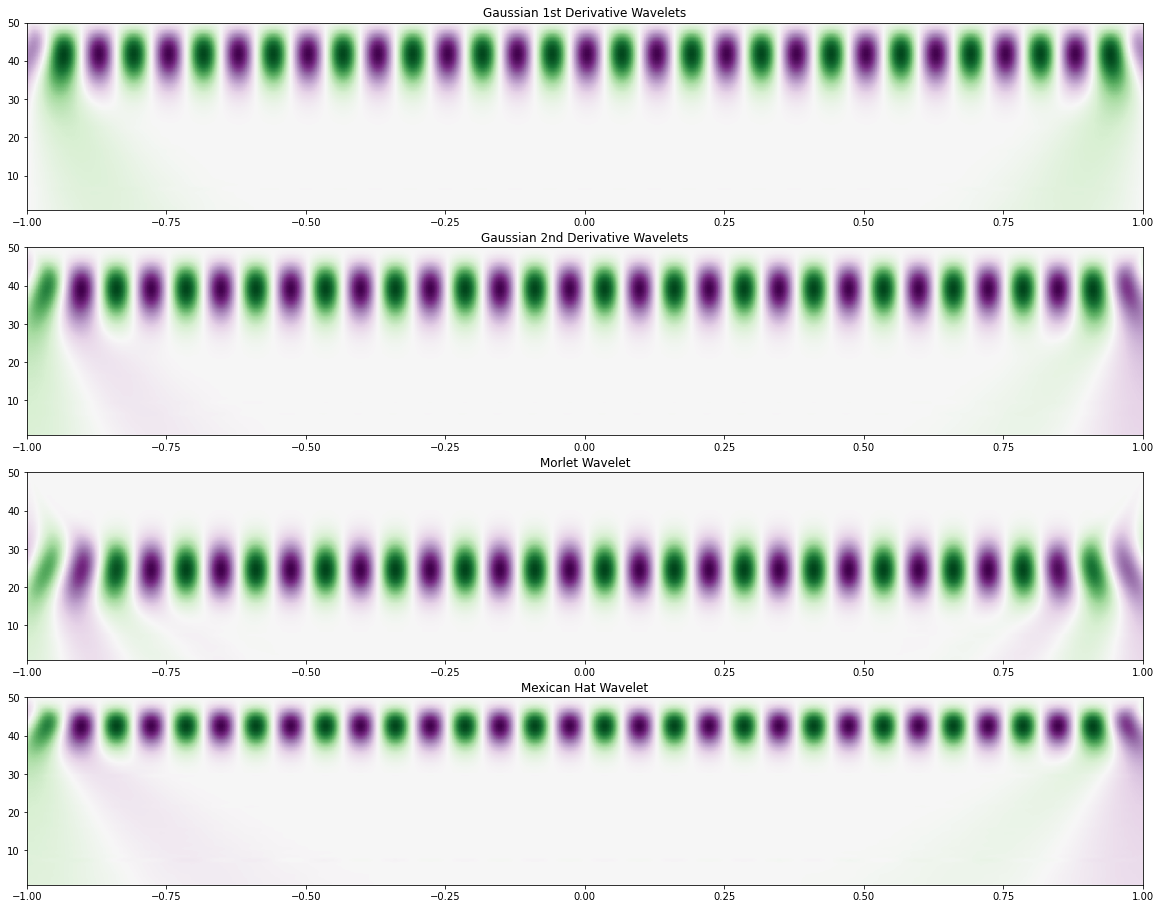

In [3]:
#Input Signal 
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
#Plotting the input Signal
plt.figure(figsize = (50,10))
plt.subplot(1,1,1)
plt.stem(y)
plt.title('Signal')

#Performing Wavelet Transformation using different types of wavelets , scale ranging from 1 to 50
plt.figure(figsize = (20,20))
plt.subplot(5,1,1)
cwtmatr, freqs=pywt.cwt(y,np.arange(1,50),'gaus1') #Continuous Wavelet Transformation, cwt(signal,scales,wavelet=Gaussian 1st order derivative wavelet)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 50], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title('Gaussian 1st Derivative Wavelets')

cwtmatr, freqs=pywt.cwt(y,np.arange(1,50),'gaus2') #Continuous Wavelet Transformation, cwt(signal,scales,wavelet= Gaussian 2nd order derivative wavelet)
plt.subplot(5,1,2)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 50], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title('Gaussian 2nd Derivative Wavelets')

plt.subplot(5,1,3)
cwtmatr, freqs=pywt.cwt(y,np.arange(1,50),'morl') #Continuous Wavelet Transformation, cwt(signal,scales,wavelet= morlet wavelet)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 50], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title('Morlet Wavelet')

plt.subplot(5,1,4)
cwtmatr, freqs=pywt.cwt(y,np.arange(1,50),'mexh') #Continuous Wavelet Transformation, cwt(signal,scales,wavelet= mexican hat)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 50], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title('Mexican Hat Wavelet')

***Explanation***

At first a sinusoidal signal was taken as input. Then continuous wavelet transformation was applied to the signal at the scale of 1 to 50 using 4 different types of wavelets:

 1.Gaussian 1st order derivative wavelet

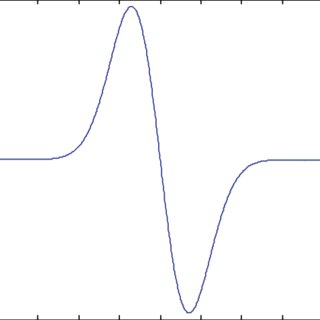

2.Gaussian 2nd order derivative wavelet

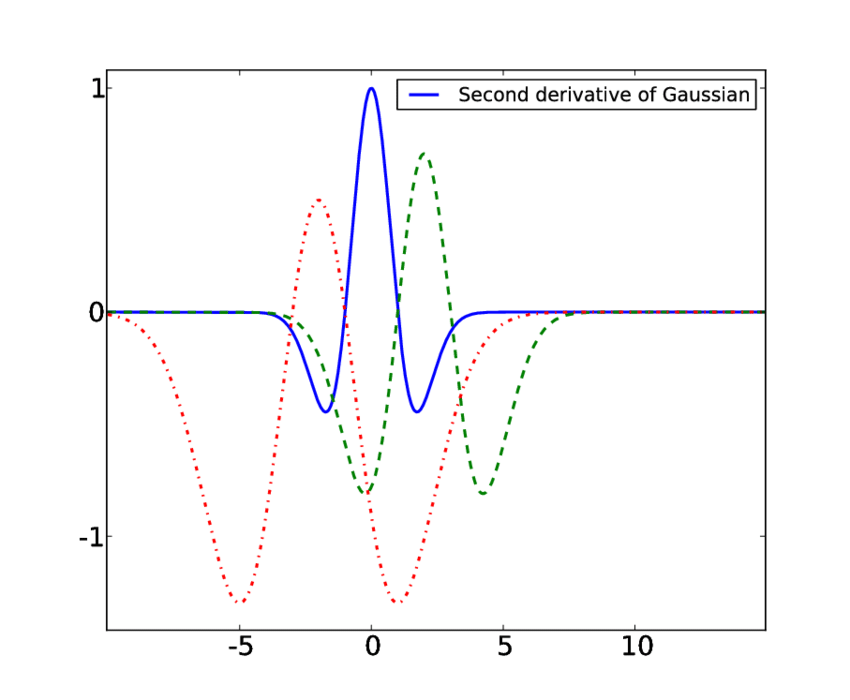 

3.Morlet wavelet 


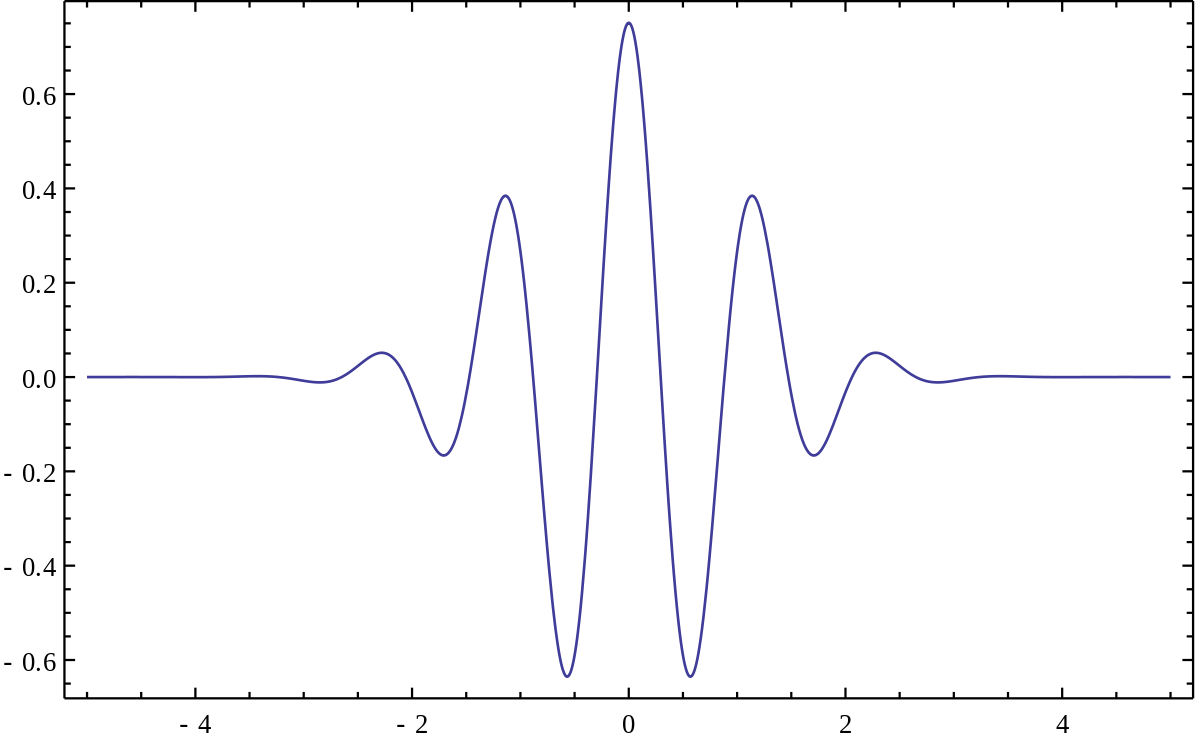


4. Mexican hat wavelet:


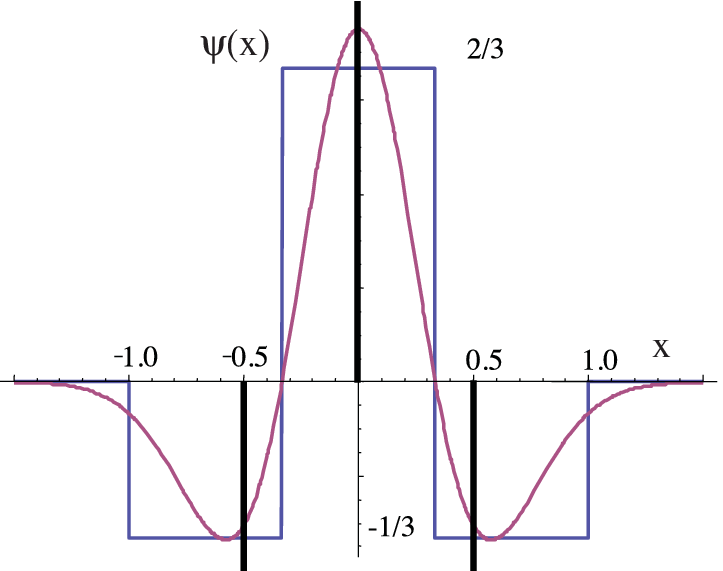



In the output, lower scales have finer frequency details. When wavelets are compressed, there are high frequencies which capture the high frequency detail available in the signal. As the system goes to higher scales the wavelets are stretched, so they capture low frequency details. These results ae shown in different scalogram for each different type of wavelet.


# Discrete Wavelet Transformation of Image

A discrete wavelet transform (DWT) is a transform that decomposes a given signal into a number of sets, where each set is a time series of coefficients describing the time evolution of the signal in the corresponding frequency band. Wavelets allow both time and frequency analysis of signals simultaneously because of the fact that the energy of wavelets is concentrated in time and still possesses the wave-like (periodic) characteristics. As a result, wavelet representation provides a versatile mathematical tool to analyze transient, time-variant (non-stationary) signals that are not statistically predictable especially at the region of discontinuities – a feature that is typical of images having discontinuities at the edges. 

Discrete wavelet transform (DWT)- Filter Bank which is based on column & row operation  does two operations: 1. Wavelet Decomposition 2. Wavelet Reconstruction.



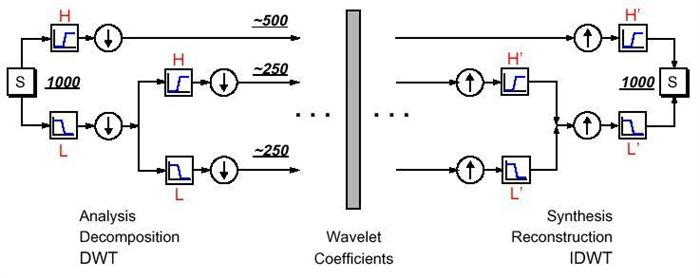

***Wavelet Decomposition:***
A wavelet filter bank is an array of wavelet filters used to decompose a signal into sub-bands over different regions of the frequency spectrum, without losing the time domain characterization as performed by the Fourier transform. Wavelet decomposition operation return some coefficients, like:

cA= Approximation Coefficient

cV= Vertical Detailed Coefficient



cH= Horizontal Detailed Coefficient


cD= Diagonal Detailed Coefficient.



For downsampling in this decomposition process, the image shape is reduced by half.

***Wavelet Reconstruction:***
This is the opposite of decomposition process. Same coefficients are also output of this process. Here for upsampling, the reconstructed image becomes the same size of the input image.


*Importing Libraries*

In [5]:
import numpy as np
import pywt
import pywt.data
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

***Loading the image from google drive and preprocessing it to a Gray Scale Image***

In [6]:
from google.colab import drive
drive.mount('/content/drive')
img = Image.open(r"/content/drive/My Drive/DIP/lina.jpg")
img = ImageOps.grayscale(img)

Mounted at /content/drive


***Single Level Discrete Wavelet Transformation***

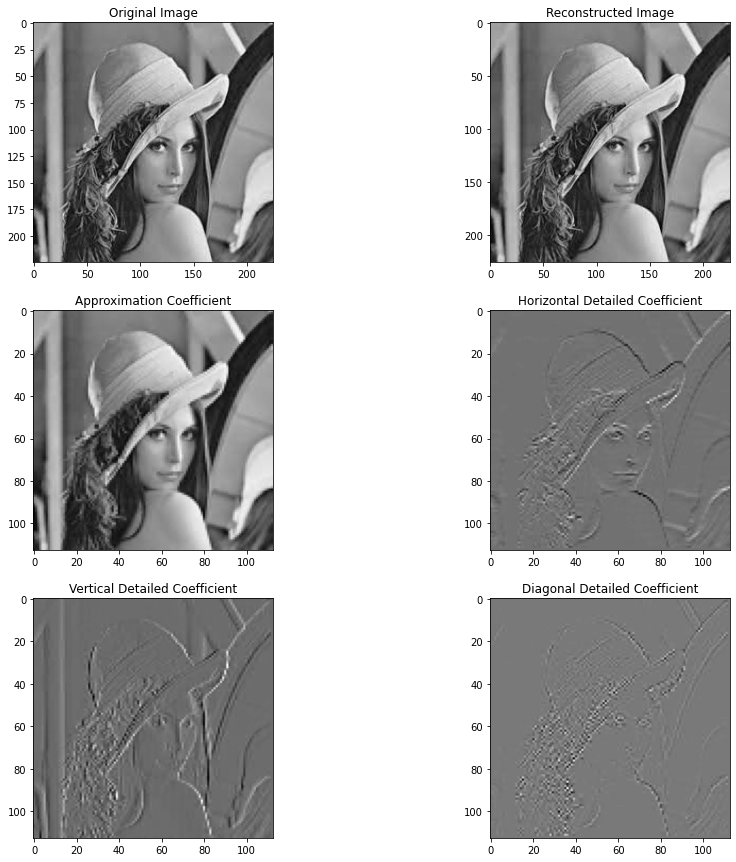

In [7]:
#Image decomposition using Discrete Wavelet Transformation
coeffs2 = pywt.dwt2(img, 'haar', mode='periodization')
c = pywt.cwt
cA, (cH, cV, cD) = coeffs2

#Image reconstruction using Inverse Discrete Wavelet Transformation
re_img = pywt.idwt2(coeffs2, 'haar', mode='periodization')


#Image Plotting
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(3,2,2)
plt.title('Reconstructed Image')
plt.imshow(re_img, cmap='gray')

plt.subplot(3,2,3)
plt.title('Approximation Coefficient')
plt.imshow(cA, cmap='gray')

plt.subplot(3,2,4)
plt.title('Horizontal Detailed Coefficient')
plt.imshow(cH, cmap='gray')

plt.subplot(3,2,5)
plt.title('Vertical Detailed Coefficient')
plt.imshow(cV, cmap='gray')

plt.subplot(3,2,6)
plt.title('Diagonal Detailed Coefficient')
plt.imshow(cD, cmap='gray')


***Explanation:***
Wavelet transformation detects abrupt changes. Abrupt change occurs at the edges. In the output, approximation coefficient approximates all kind of edge where vertical, horizontal and diagonal coefficients detect vertical, horizontal and diagonal edges respectively. That's the strength of discrete wavelet transformation. 

***Multilevel Discrete Wavelet Transformation***

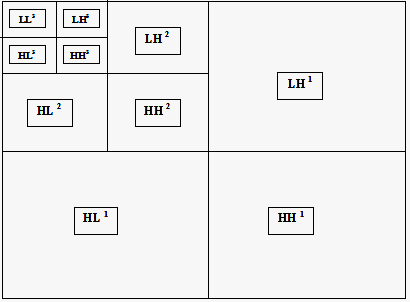

The images are convolved with high pass and low pass filters. These images are downsampled by rows which ultimately yields four subband images of half the size of original image. Thus the four subband images generated are LL1, LH1 , HL1 and HH1. LL1, LH1 and HH1 contain the horizontal, vertical, and diagonal information of the image. LL1 is the approximation coefficient and contains the maximum information of the image. LL1 is selected for the next round of decomposition in the same manner as that of the original image. From the next round also, approximation coefficient, that is LL2 is extracted. Similarly the image is decomposed by two-dimensional wavelet decomposition up to 3 levels.  The approximation coefficients obtained, that is LL1, LL2 and LL3 are then used to form the feature set as demonstrated in the following subsections. 

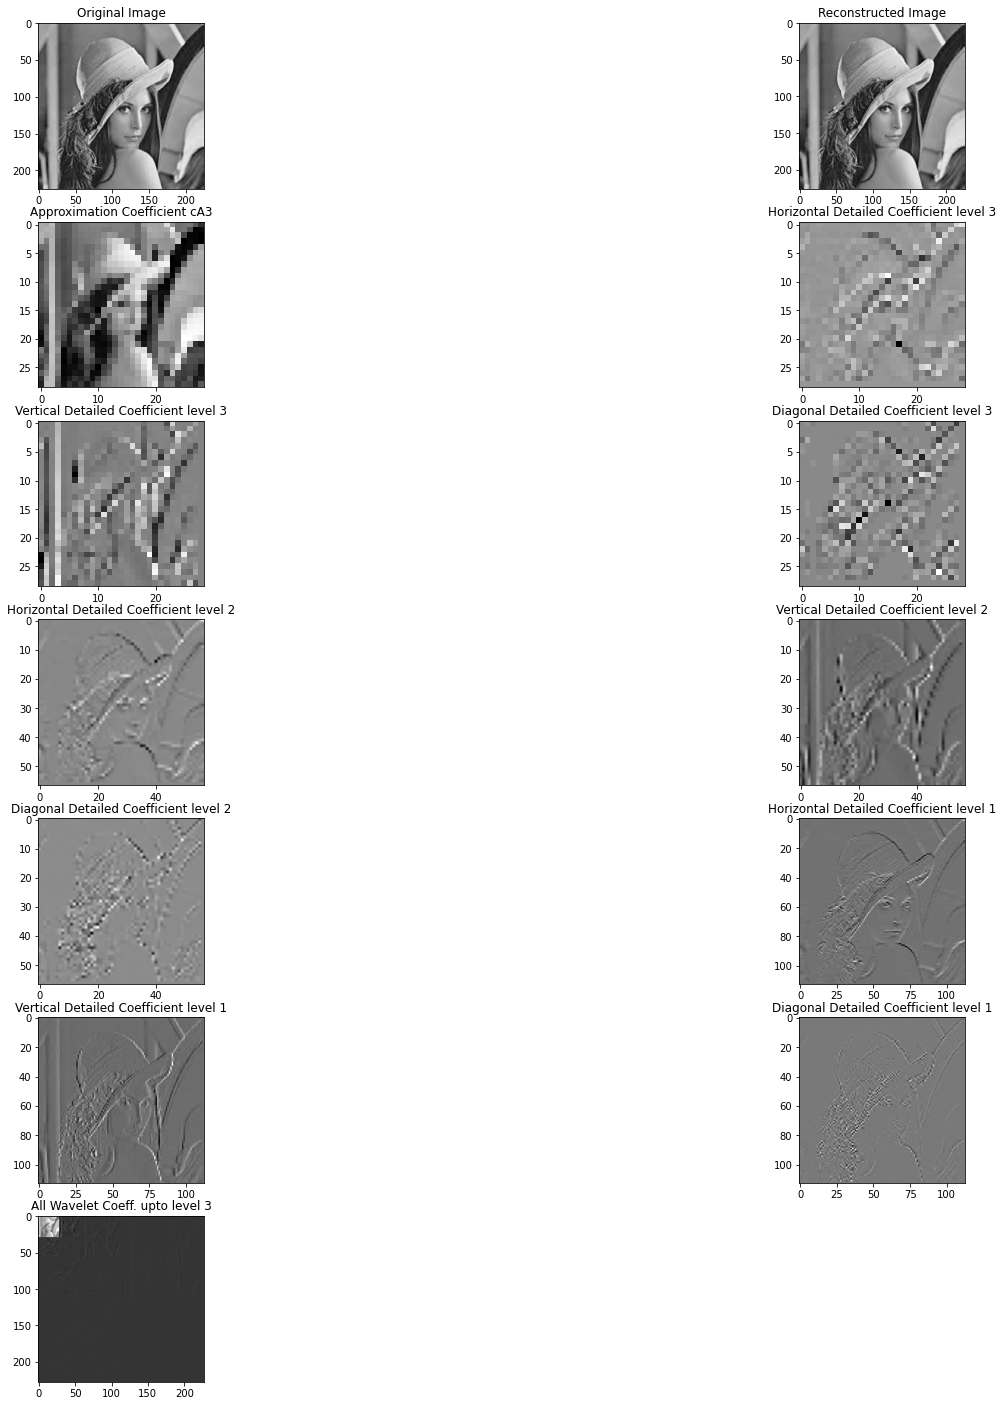

In [25]:
#Image decomposition using Discrete Wavelet Transformation
coeffs = pywt.wavedec2(img, 'haar', mode='periodization', level=3)
#coefficients
cA3= coeffs[0]
(cH3, cV3, cD3) = coeffs[-3]
(cH2, cV2, cD2) = coeffs[-2]
(cH1, cV1, cD1) = coeffs[-1]

#Image reconstruction using Inverse Discrete Wavelet Transformation
re_img= pywt.waverec2(coeffs, 'haar', mode='periodization')

#Image Plotting
plt.figure(figsize = (25,25))
plt.subplot(7,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(7,2,2)
plt.title('Reconstructed Image')
plt.imshow(re_img, cmap='gray')

plt.subplot(7,2,3)
plt.title('Approximation Coefficient cA3')
plt.imshow(cA3, cmap='gray')

plt.subplot(7,2,4)
plt.title('Horizontal Detailed Coefficient level 3')
plt.imshow(cH3, cmap='gray')

plt.subplot(7,2,5)
plt.title('Vertical Detailed Coefficient level 3')
plt.imshow(cV3, cmap='gray')

plt.subplot(7,2,6)
plt.title('Diagonal Detailed Coefficient level 3')
plt.imshow(cD3, cmap='gray')

plt.subplot(7,2,7)
plt.title('Horizontal Detailed Coefficient level 2')
plt.imshow(cH2, cmap='gray')

plt.subplot(7,2,8)
plt.title('Vertical Detailed Coefficient level 2')
plt.imshow(cV2, cmap='gray')

plt.subplot(7,2,9)
plt.title('Diagonal Detailed Coefficient level 2')
plt.imshow(cD2, cmap='gray')

plt.subplot(7,2,10)
plt.title('Horizontal Detailed Coefficient level 1')
plt.imshow(cH1, cmap='gray')

plt.subplot(7,2,11)
plt.title('Vertical Detailed Coefficient level 1')
plt.imshow(cV1, cmap='gray')

plt.subplot(7,2,12)
plt.title('Diagonal Detailed Coefficient level 1')
plt.imshow(cD1, cmap='gray')

#All coefficients together
array, coeff_slices=pywt.coeffs_to_array(coeffs)
plt.subplot(7,2,13)
plt.title('All Wavelet Coeff. upto level 3')
plt.imshow(array, cmap='gray')


***Explanation:***

In 3 level discrete wavelet transformation, at first the image gets devided into 4 coefficient matrices similar to single level DWT. Approximation coefficient matrcies are devided 2 times where for every time we get reduced Horizontal Detailed Coefficient, Vertical Detailed Coefficient and Diagonal Detailed Coefficient. Wavelet transformation detects abrupt changes. Abrupt change occurs at the edges. In the output, approximation coefficient approximates all kind of edge where vertical, horizontal and diagonal coefficients detect vertical, horizontal and diagonal edges respectively, which is done 3 times in this case.